To complete this challenge, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal. For a real bonus round, identify the open access prices paid by subject area.

In [600]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [542]:
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv')
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [543]:
#df.describe()
df.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)'],
      dtype='object')

In [544]:
#change cost to numeric
df['cost'] = pd.to_numeric(df['COST (£) charged to Wellcome (inc VAT when charged)'].str.split('£', expand=True)[1])

In [545]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88,685.88


In [546]:
#df[df['Journal title']=='PNAS']

In [547]:
#df1['Journal title'].value_counts()

In [548]:
#df['cost'].describe()

In [549]:
#check missing value for all columns 
print(df['Journal title'].isnull().value_counts(), '\n')
print(df['Article title'].isnull().value_counts(), '\n')
print(df['cost'].isnull().value_counts())

False    2126
True        1
Name: Journal title, dtype: int64 

False    2127
Name: Article title, dtype: int64 

False    2114
True       13
Name: cost, dtype: int64


In [550]:
#There is not many missing data, mostly with 0.6% for 'cost'. Delete any row with missing values. 
df1 = df[['Journal title', 'Article title', 'cost']]
df1 = df1.dropna()
df1.describe()
df1.head()

,Journal title,Article title,cost
0,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88


In [551]:
#remove non-letter string
titles_withspace = []
titles_withoutspace = []
for title in df1['Journal title']:
    title = "".join([c for c in title.lower() if c in ' abcdefghijklmnopqrstuvwxyz'])
    titles_withspace.append(title)
    titles_withoutspace.append(title.replace(' ',''))
df1['title_ws'] = titles_withspace
df1['title_wos'] = titles_withoutspace
df1.head()

,Journal title,Article title,cost,title_ws,title_wos
0,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00,psychological medicine,psychologicalmedicine
1,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04,biomacromolecules,biomacromolecules
2,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,j med chem,jmedchem
3,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64,j med chem,jmedchem
4,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88,j org chem,jorgchem


In [552]:
#split each title
split_titles = []
for title in df1['title_ws']:
    split_titles.append(sorted(title.split()))
#split_titles

In [553]:
#take off stopwords 
no_stopwords = []
for title in df1['title_ws']:
    title = ' '.join([word for word in title.split() if word not in ('the', 'j', 'a', 'journal', 'is', 'of', 
                                                                             'for', 'in', 'with','journals')])
    no_stopwords.append(title.replace(' ',''))
df1['no_stopwords'] = no_stopwords
df1.head()

,Journal title,Article title,cost,title_ws,title_wos,no_stopwords
0,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00,psychological medicine,psychologicalmedicine,psychologicalmedicine
1,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04,biomacromolecules,biomacromolecules,biomacromolecules
2,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,j med chem,jmedchem,medchem
3,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64,j med chem,jmedchem,medchem
4,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88,j org chem,jorgchem,orgchem


In [557]:
#initials for each title
initials = []
for title in df1['title_ws']:
    if len(title) > 8:
        title = ''.join([word[0] for word in title.split()])
    else:
        title = ''.join([word for word in title])
    initials.append(title.replace(' ',''))
df1['title_init'] = initials
df1.head()
#df1[df1['title_init'] == 'pnas']

,Journal title,Article title,cost,title_ws,title_wos,no_stopwords,title_init
0,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00,psychological medicine,psychologicalmedicine,psychologicalmedicine,pm
1,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04,biomacromolecules,biomacromolecules,biomacromolecules,b
2,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,j med chem,jmedchem,medchem,jmc
3,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64,j med chem,jmedchem,medchem,jmc
4,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88,j org chem,jorgchem,orgchem,joc


In [535]:
#df1['acronym'] = df1['title_ws'].isin(df1['title_init'])
#df1[df1['acronym']==True]['title_init'].value_counts().sort_index()
#df1.head()

In [537]:
#df1['title_init'].value_counts().head()

In [536]:
#df1['no_stopwords'].value_counts()

In [538]:
#df1['title_init'].value_counts()

In [556]:
#out = pd.DataFrame(df1.groupby(["title_init", "no_stopwords"]).size())
#out.columns = ['count']
#out.sort_values('count', ascending=False)

In [558]:
df1['journal_id'] = df1['title_init']
#use init for 3 characters or longer, use no_stopwords for the rest
def final (row):
    if len(row['journal_id']) >=3: 
        val = row['title_init']
    else:
        val = row['no_stopwords']
    return val

df1['journal_id'] = df1.apply(final, axis=1)
df1.head()

,Journal title,Article title,cost,title_ws,title_wos,no_stopwords,title_init,journal_id
0,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00,psychological medicine,psychologicalmedicine,psychologicalmedicine,pm,psychologicalmedicine
1,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04,biomacromolecules,biomacromolecules,biomacromolecules,b,biomacromolecules
2,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,j med chem,jmedchem,medchem,jmc,jmc
3,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64,j med chem,jmedchem,medchem,jmc,jmc
4,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88,j org chem,jorgchem,orgchem,joc,joc


In [519]:
#df1['journal_id'].value_counts()

In [654]:
#five most common journals and their aggregated cost info
result = pd.DataFrame(df1.groupby('journal_id')['cost'].describe().sort_values('count', ascending=False).round(2).head(5))
result.reset_index(level=0, inplace=True)
#result

,journal_id,count,mean,std,min,25%,50%,75%,max
0,plosone,200.0,41852.75,196539.65,122.31,850.78,897.09,1044.59,999999.00
1,jobc,54.0,19908.90,135890.46,265.67,1151.13,1301.14,1610.15,999999.00
2,jon,31.0,34044.14,179274.34,614.73,1532.98,1915.92,2212.21,999999.00
3,nar,29.0,1162.34,442.15,710.00,852.00,852.00,1704.00,2184.00
4,neuroimage,29.0,2215.17,266.65,1747.16,2100.54,2326.43,2396.57,2503.34


In [657]:
result['journal_id'] = ['Plos One', 'Journal of Biological Chemistry', 'Journal of Neurophysiology',
                       'Nucleic Acids Research', 'Neuroimage']
result

,journal_id,count,mean,std,min,25%,50%,75%,max
0,Plos One,200.0,41852.75,196539.65,122.31,850.78,897.09,1044.59,999999.00
1,Journal of Biological Chemistry,54.0,19908.90,135890.46,265.67,1151.13,1301.14,1610.15,999999.00
2,Journal of Neurophysiology,31.0,34044.14,179274.34,614.73,1532.98,1915.92,2212.21,999999.00
3,Nucleic Acids Research,29.0,1162.34,442.15,710.00,852.00,852.00,1704.00,2184.00
4,Neuroimage,29.0,2215.17,266.65,1747.16,2100.54,2326.43,2396.57,2503.34


In [645]:
#df1[df1['journal_id'] == 'neuroimage']

In [561]:
#remove non-letter string from article title
article_withspace = []
#article_withoutspace = []
for title in df1['Article title']:
    title = "".join([c for c in title.lower() if c in ' abcdefghijklmnopqrstuvwxyz'])
    article_withspace.append(title)
    #article_withoutspace.append(title.replace(' ',''))
df1['article_ws'] = article_withspace
#df1['article_wos'] = art_withoutspace
df1.head()

,Journal title,Article title,cost,title_ws,title_wos,no_stopwords,title_init,journal_id,article_ws
0,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00,psychological medicine,psychologicalmedicine,psychologicalmedicine,pm,psychologicalmedicine,reduced parahippocampal cortical thickness in ...
1,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04,biomacromolecules,biomacromolecules,biomacromolecules,b,biomacromolecules,structural characterization of a model gramneg...
2,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,j med chem,jmedchem,medchem,jmc,jmc,fumaroylaminoepoxymorphinans and related opioi...
3,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64,j med chem,jmedchem,medchem,jmc,jmc,orvinols with mixed kappamu opioid receptor ag...
4,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88,j org chem,jorgchem,orgchem,joc,joc,regioselective opening of myoinositol orthoest...


In [562]:
#take off stopwords from article title 
no_stopwords = []
for title in df1['article_ws']:
    title = ' '.join([word for word in title.split() if word not in ('the', 'j', 'a', 'journal', 'is', 'of', 
                                                                             'for', 'in', 'with','journals')])
    no_stopwords.append(title)
df1['article_id'] = no_stopwords
df1.head()

,Journal title,Article title,cost,title_ws,title_wos,no_stopwords,title_init,journal_id,article_ws,article_id
0,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00,psychological medicine,psychologicalmedicine,psychologicalmedicine,pm,psychologicalmedicine,reduced parahippocampal cortical thickness in ...,reduced parahippocampal cortical thickness sub...
1,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04,biomacromolecules,biomacromolecules,biomacromolecules,b,biomacromolecules,structural characterization of a model gramneg...,structural characterization model gramnegative...
2,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,j med chem,jmedchem,medchem,jmc,jmc,fumaroylaminoepoxymorphinans and related opioi...,fumaroylaminoepoxymorphinans and related opioi...
3,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64,j med chem,jmedchem,medchem,jmc,jmc,orvinols with mixed kappamu opioid receptor ag...,orvinols mixed kappamu opioid receptor agonist...
4,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88,j org chem,jorgchem,orgchem,joc,joc,regioselective opening of myoinositol orthoest...,regioselective opening myoinositol orthoesters...


In [563]:
from nltk.tokenize import casual_tokenize
articles = []
for i, row in df1.iterrows():
    article = casual_tokenize(row['article_id'])
    journal = row['journal_id']
    articles.append((journal, article))
    #print(i)
    #print(row)
articles[0:5]
journals, articles = zip(*articles)
articles[0:5]

(['reduced',
  'parahippocampal',
  'cortical',
  'thickness',
  'subjects',
  'at',
  'ultrahigh',
  'risk',
  'psychosis'],
 ['structural',
  'characterization',
  'model',
  'gramnegative',
  'bacterial',
  'surface',
  'using',
  'lipopolysaccharides',
  'from',
  'rough',
  'strains',
  'escherichia',
  'coli'],
 ['fumaroylaminoepoxymorphinans',
  'and',
  'related',
  'opioids',
  'irreversible',
  'opioid',
  'receptor',
  'antagonist',
  'effects'],
 ['orvinols', 'mixed', 'kappamu', 'opioid', 'receptor', 'agonist', 'activity'],
 ['regioselective',
  'opening',
  'myoinositol',
  'orthoesters',
  'mechanism',
  'and',
  'synthetic',
  'utility'])

In [224]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
#token frequency--Tf
#inverse document frequency--idf

In [569]:
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf = tfidf.fit(df1['article_id'])
df_tfidf = pd.DataFrame(tfidf.transform(df1['article_id']).todense())
df_tfidf.columns = tfidf.get_feature_names()
df_tfidf.head()

,aa,aac,aagab,aavmediated,abasic,abcbadeficient,abdominal,abduction,aberrant,aberrations,...,zimbabwe,zincinduced,znf,znfa,zoites,zone,zoonoses,zoonotic,zoster,zuckerman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [632]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

In [633]:
topic_vectors = pca.fit_transform(df_tfidf.values)
topic_vectors = pd.DataFrame(topic_vectors)
topic_vectors['journal'] = df1['journal_id']
topic_vectors.groupby('journal').mean()
#topic_vectors.head()
#scatter plot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
journal,,,,,,,,,,,,,,,,,,,,
aaa,-0.048342,-0.030663,0.036332,-0.025776,-0.035525,0.116392,-0.037119,0.109070,-0.052369,-0.056688,0.026924,0.015317,-0.063567,0.048700,-0.049453,-0.012590,-0.043011,-0.004353,-0.056901,-0.059522
aaac,-0.022527,-0.013568,-0.003694,0.007482,-0.018374,-0.003822,-0.009062,0.012724,0.005023,-0.009865,0.007603,-0.003305,0.016891,0.011921,-0.028651,0.008923,-0.004953,-0.006596,-0.028788,-0.005613
aar,-0.044372,-0.060641,0.033485,-0.039330,-0.002042,-0.003037,0.011173,-0.009624,0.008685,-0.014015,-0.013737,-0.001829,0.000332,0.002411,0.004200,-0.000839,-0.010670,-0.007192,-0.004701,-0.012951
aaria,0.024319,-0.168950,0.166312,0.052770,-0.057837,-0.035738,0.079609,0.054824,-0.058291,0.017973,-0.073763,0.003979,-0.021855,0.003855,0.022603,0.081828,-0.017617,-0.072571,-0.030211,-0.006848
aars,-0.033029,-0.067636,0.066903,-0.041605,0.024825,0.045145,-0.033403,0.019573,-0.027011,-0.011545,0.013711,0.039687,-0.008941,0.005812,-0.017405,-0.014654,-0.019192,-0.026863,0.000927,-0.010829
abc,0.049496,0.041294,-0.011828,-0.040199,-0.025220,-0.013592,-0.017645,-0.014288,-0.006587,-0.024229,-0.013228,-0.023121,-0.016967,0.020220,0.014243,0.043000,-0.006793,0.026037,-0.024078,0.018383
acb,-0.037973,-0.030832,-0.040540,-0.008673,0.005851,-0.000980,-0.042316,0.007761,0.039051,0.057586,-0.021768,-0.061815,-0.009389,-0.035288,-0.013164,0.032143,0.035087,-0.000887,-0.056968,-0.017335
acd,-0.051951,-0.041921,-0.049353,0.010671,-0.023451,0.015797,-0.044705,0.046644,0.017767,0.043688,0.017163,-0.033611,-0.033892,-0.069536,0.036515,-0.042186,-0.055637,0.010608,-0.077335,0.029388
acie,-0.023740,-0.006958,-0.030404,0.006951,-0.006227,-0.040696,0.002555,-0.004463,-0.014717,-0.025044,-0.023352,0.013179,0.005403,-0.005165,-0.015093,-0.017693,0.008608,0.015534,-0.002397,0.008667


In [626]:
#print(pca.components_)
#print(pca.explained_variance_ratio_)

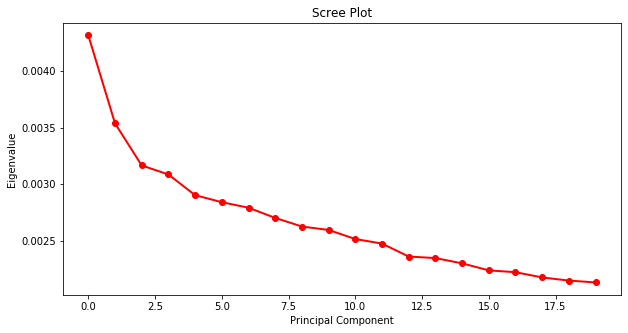

In [631]:
fig = plt.figure(figsize=(10,5))
sing_vals = np.arange(0, pca.n_components_, 1)
eigvals = pca.explained_variance_ratio_
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()